## Exploratory Data Analysis of Diabetes dataset

### Task Description   
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).
Note: Please keep in mind that use of python is needed to showcase your skills and writing



### Objective of this Notebook
This notebook is an example of how to perform an EDA on a dataset with the goal of providing an example of clear and easy to understand python code. After following this notebook you will have an understanding of:
* How python can be used to perform EDA
* How markdown, codeblocks and code comments can be used to explain code.
* How a hypothesis driven approach to EDA can be helpful for understanding the value of data.




### Notebook Methodology

This notebook will guide the reader through the initial exploration of the dataset provided with the goal of establishing the suitability of the data to be used for further analysis. We will seek to understand the potentially useful features (columns) and gain trust in the suitability of this dataset as the basis of predictive analysis. We will follow the principle of EDA as set out by John Tukey in that we will seek to confirm the expected and show the unexpected. Ultimately we will seek to answer the questions:
1. Are there problems in the dataset that should be considered when using this dataset?
2. Is this dataset suitable for analysis of diabetes in patients?
3. Are there features of the dataset that are likely to be useful in the prediction of diabetes in patients?
4. How should we proceed with creating a predictive model? 

### Notebook Description
We will use the the first section to gain confidence in the dataset and ensure it is suitable for further analysis. We load the dataset and explore the size and shape of the data as well as understand the types of data each column contains. We start with the question: "Are there problems in the dataset that should be considered when using this dataset?". If so, such as unexpected or missing values, they will be identified and dealt with. We conclude this section by answering the second question: "Is this dataset suitable for analysis of diabetes in patients?" 

In the second section we will make a number of hypothesis based on our initial exploration of the data. These results of the hypothesis will guide future work on this dataset. We will look deeper into the contents of the columns that we expect to be useful columns and allow us to confirm or reject our hypotheses from section one and ultimately help us answer the questions "Are there features of the dataset that are likely to be useful in the prediction of diabetes in patients?". To do this we will check the variability of the independent and dependent variables and look for correlation between the variables. This will allow us to identify potential features to be used in statistical models related that will allow us to understand the drivers of the independent variable.

The final section will summarize the findings and present potential next steps  that could be taken and answer our final question of "How should we proceed with creating a predictive model?".

### Section 1: Understanding the Data

#### Section 1.1 Load and Review Data
We go into the EDA with the expectation that each column contains complete and valid data. We will inspect the columns and rows to find any violations of this and deal with this either by removing, changing or ignoring the data until we are satisfied that we can have a positive answer to our question "Is this dataset suitable for analysis of diabetes in patients? Before we can do that we must be able to answer confidently the question: "Are there problems in the dataset that should be considered when using this dataset?"

In [1]:
# We will use pandas to explore the load, explore and manipulate the data. Our first step is to import the required package. 
import pandas as pd

# To make statistics easier to read we set the default display properties to 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

In [2]:

# We will create a function to load the data into a dataframe.
# This allows us to easily re-run this step whenever necessary in case of needing to revert to fresh data.

def load_diabetes_data(data="data/diabetes (1).csv", display_metadata=True):
    """
    Load diabetes data from a CSV file into a pandas DataFrame.
    Parameters: 
    - data (str): The path to the CSV file containing diabetes data.
    - display_meta_data (bool) : Should metadata be displayed
    Returns: a pandas DataFrame containing diabetes data from the csv file.

    """
    diabetes_df = pd.read_csv(data)
    if display_metadata:
        no_cols, no_rows = diabetes_df.shape
        print(f"Number of columns: {no_cols}")
        print(f"Number of rows: {no_rows}")
        print("Column Info:")
        diabetes_df.info()
        
    return diabetes_df



In [3]:
# We run the function to lead the data and display the metadata
diabetes_df = load_diabetes_data()

Number of columns: 768
Number of rows: 9
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   767 non-null    float64
 2   BloodPressure             765 non-null    object 
 3   SkinThickness             764 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    object 
 7   Age                       768 non-null    int64  
 8   Outcome                   766 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 54.1+ KB


#### Initial understanding of data
In Section 1.1 we have loaded the data and reviewed the metadata. We have found a small number of null values in the **Glucose**, **BloodPressure**, **SkinThinckness**, **Insulin**, **BMI**, **DiabetesPedigreeFunction**, and **Outcome** columns.  
We will consider how to handle this in the data cleaning phase. Either by removing the lines or ignoring the columns.
Based on the metadata we see the data contains mainly numeric data along with two columns which are "object". This usually points to a column that contains mixed data types, missing data or problematic data.  
We note that the **BloodPressure** and **DiabetesPedigreeFunction** need to be cleaned to have a single data type rather than object.  This may solved while dealing with the null values.
Once we have cleaned the data we can continue to see if we can use the data further.

#### Section 1.2 Identify Problems in data


We will ready our data for inspection by cleaning null values and fixing data types.
As noted before **BloodPresure** and **DiabetesPedigreeFunction** are "object" data types. This can be caused by data not conforming to expectations. There were also null values identfied in many columns. We will display any problematic and null values in the dataset so we can decide how to clean them before moving on to further analysis in of the data.

In [4]:
# We display a sample of rows to understand the data inside the columns.
display(diabetes_df.head(10))
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72,35.00,0.00,33.60,0.627,50,1.00
1,1,85.00,66,29.00,0.00,26.60,0.351,31,0.00
2,8,183.00,64,0.00,0.00,23.30,0.672,32,1.00
3,1,89.00,66,23.00,94.00,28.10,0.167,21,0.00
4,0,137.00,40,35.00,168.00,43.10,2.288,33,1.00
5,5,116.00,74,0.00,0.00,25.60,0.201,30,0.00
6,3,78.00,50,32.00,88.00,31.00,0.248,26,1.00
7,10,115.00,0,0.00,0.00,35.30,0.134,29,0.00
8,2,197.00,70,45.00,543.00,30.50,0.158,53,1.00
9,8,125.00,96,0.00,0.00,0.00,0.232,54,1.00


Based on the results of the above we expect all the coumns to be numeric in some way. We can see which values of the BloodPressure and DiabetesPedigireeFunction columns are non-numeric. 
We should inspect the non conforming rows.

In [5]:
# Here we make a function that returns the rows that do not conform to a numeric datatype

def non_conform_rows(df, columns):
    """
    Return a new DataFrame containing rows that do not conform to specified data types.

    Parameters:
    - df: The DataFrame to check for non-conforming rows.
    - columns (list): A list of column names to check for data type conformity.
    
    Returns:
    - non_conforming_df : A new DataFrame containing rows that do not conform to numeric data type.

    """
    non_conforming_rows = []
    
    for column in columns:
        non_conforming_rows.append(df[pd.to_numeric(df[column], errors="coerce").isna()])
    
    non_conforming_df = pd.concat(non_conforming_rows, ignore_index=True)
    
    return non_conforming_df

In [6]:
# We call our function with our dataframe and all columns in that dataframe and allow the output to be displayed so we can see what the issues look like
non_conform_rows(diabetes_df, diabetes_df.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,NaN,104,0.00,0.00,37.70,0.151,52,1.00
1,2,100.00,NaN,23.00,0.00,29.70,0.368,21,0.00
2,5,143.00,NaN,0.00,0.00,45.00,0.19,47,NaN
3,7,136.00,NaN,26.00,135.00,26.00,0.647,51,0.00
4,2,112.00,missed value,32.00,0.00,35.70,0.148,21,0.00
5,9,156.00,86,NaN,155.00,34.30,1.189,42,1.00
6,3,148.00,66,NaN,0.00,32.50,0.256,22,0.00
7,2,87.00,0,NaN,0.00,28.90,0.773,25,0.00
8,0,104.00,64,NaN,116.00,27.80,0.454,23,0.00
9,1,128.00,98,41.00,NaN,32.00,1.321,33,1.00


In [7]:
# We can check what percentage of our data is affected by counting rows that do not conform and total rows in the df
count_non_conforming_rows = len(non_conform_rows(diabetes_df, diabetes_df.columns))
total_rows =  len(diabetes_df)    
# calculate the share of bad rows and display the values using an f string
percentage_null = 100 * count_non_conforming_rows / total_rows
print(f"{count_non_conforming_rows} rows with non-conforming values")
print(f"{percentage_null:.2f} % of rows have non-conforming values:")

18 rows with non-conforming values
2.34 % of rows have non-conforming values:


#### 1.3 Removing Missing Values

Based on the above value that less than 2.5% of rows are problematic at this point, we can remove them from our dataset and convert the object columns to specific data types. Based on the review of the data, **BloodPressure** should be an Integrer and **DiabetesPedigreeFunction** should be a float. We will create a function that does those steps.


In [8]:
# Create a new dataframe that returns a dataframe containing only conforming rows  and corrected datatypes of given columns.
def conform_rows(df, columns, dtype_mapping={"BloodPressure": "int64", "DiabetesPedigreeFunction": "float64"}):
    """
    Return a new DataFrame containing only rows that conform to numeric data types.

    Parameters:
    - df: The DataFrame to check for non-conforming rows.
    - columns (list): A list of column names to check for data type conformity.
    - dtype_mapping (dict): dictionary mapping column names to datatypes.
    
    Returns:
    - conforming_df (pandas.DataFrame): A new DataFrame containing rows that conform to numeric data type.

    """
    # Check each column and create mask of true / false value where there are conforming / non-conforming values
    for column in columns:
        conforming_mask = pd.to_numeric(df[column], errors="coerce").notna()
        df = df[conforming_mask]
    
    #apply the dtype_mapping to the dataframe
    if dtype_mapping:
        df = df.astype(dtype_mapping)    

    return df


In [9]:
# call the cleaning function and assign to a new df
diabetes_df_clean = conform_rows(diabetes_df, diabetes_df.columns)
# Check the info of the new df to see if the changes have been applied 
diabetes_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               752 non-null    int64  
 1   Glucose                   752 non-null    float64
 2   BloodPressure             752 non-null    int64  
 3   SkinThickness             752 non-null    float64
 4   Insulin                   752 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  752 non-null    float64
 7   Age                       752 non-null    int64  
 8   Outcome                   752 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 58.8 KB


We see that we have 752 remaining non-null values in all columns and the columns are all numeric types.

#### Section 1.4 Finding outliers and miscoded values inside the data
We will use our existing knowledge of the dataset based on the column headers and external help to understand what the range of expected values should be. 
We will then use this to identify outliers and missing values.

In [10]:
diabetes_df_clean.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00
mean,3.86,"13,417.10",69.13,20.52,79.80,32.00,0.47,33.21,0.35
std,3.38,"364,621.61",19.27,16.01,115.75,7.92,0.33,11.68,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,63.50,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,27.00,32.05,0.37,29.00,0.00
75%,6.00,140.00,80.00,32.00,126.25,36.60,0.62,40.25,1.00
max,17.00,"9,999,000.00",122.00,99.00,846.00,67.10,2.42,81.00,1.00


#### Explaination of Columns
Based on the above and a available sources in the internet we can make some assumptions about the meaning of each column.
The data set as a whole represents information on individual patients.
- **Pregnancies** - The number of pregnancies the patient has had in their lifetime.
- **Glucose** - The patient's measured glucose level.
- **BloodPressure** - The patient's measured blood pressure.
- **SkinThickness** - The patient's measured Tricep skinfold thickness in mm.
- **Insulin** -   The patient's measured insulin level.
- **BMI** -   The patient's calculated body mass index based on height and weight measurements.
- **DiabetesPedigreeFunction** - a function which scores likelihood of diabetes based on family history
- **Age** - The patient's age in years.
- **Outcome** - Whether the patient has diabetes or not (1 for yes, 0 for no)


There are  values of **0.00** in columns where this would not be expected, such as **BloodPressure** and there is at least one very high value such of 9999000 for Glucose. These should be investigated to see if they need to be excluded, replaced or ignored on the basis that they are mis-coded and implausible.

In [11]:
# We will use the matplotlib and seaborn libraries to create plots of the data. First we import these packages.
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df=diabetes_df_clean, columns=diabetes_df_clean.columns):
    """
    Plot histograms for the 9 columns in the dataframe
    Parameters:
    - df: The DataFrame to plot the histograms for.
    returns:
    - None, displays a 3 by 3 grid of histograms
    """

    # create the frame to hold the subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    # loop through the columns, plotting the histogram and placing it in the correct subplot
    for i, column in enumerate(columns):
        sns.histplot(data=diabetes_df_clean, x=column, bins=10, ax=axes[i // 3, i % 3])


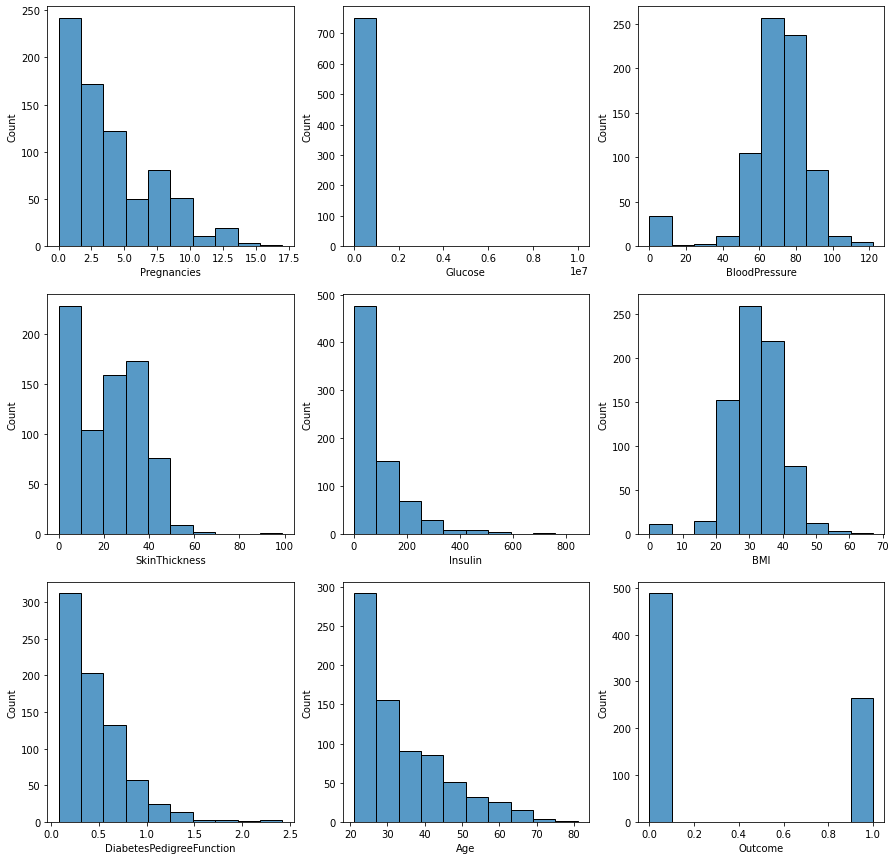

In [12]:
# Call the function with the default parameters
plot_histograms()

In [21]:
#### 1.5 Replacing Mis-coded Values

The above charts show us that the only major issue with outliers appears to come from gluclose where we have seen the maximum value of 9999000. We will replace values above 1000 with 0 and deal with them along with the other 0 values we will fix in the next step.

In [13]:
# replace all values of the glucose column that are above 1000 with 0 using a lambda function
diabetes_df_clean["Glucose"] = diabetes_df_clean["Glucose"].apply(lambda x: x == 0 if x > 1000 else x)

In [14]:
# We will create a function to display the rows that contain 0 values in the columns that should not contain 0 values.
for column in diabetes_df_clean.columns:
    zeros = len(diabetes_df_clean[diabetes_df_clean[column] == 0])
    print(f"{zeros} rows with 0 values in {column}")

109 rows with 0 values in Pregnancies
6 rows with 0 values in Glucose
34 rows with 0 values in BloodPressure
224 rows with 0 values in SkinThickness
367 rows with 0 values in Insulin
11 rows with 0 values in BMI
0 rows with 0 values in DiabetesPedigreeFunction
0 rows with 0 values in Age
488 rows with 0 values in Outcome


Based on a basic understanding of the dataset we could expect that it would be reasonable to have 0 values in the columns, **Pregnacies** and **Outcomes**. However, it is not reasonable to have 0 values in the other columns. 

In [15]:
# we will create a function that identifies rows where the value is 0 and replaces the 0 with the mean of the column
def mean_fill(df="diabetes_df_clean", column="BMI"):
    """
    create a new column that has 0 values replaced with the mean of the given column (excluding zero values), in other cases the existing value is maintained.

    Parameters:
    - df: The DataFrame that contains columns with erroneous 0 values.
    
    Returns:
    - df (pandas.DataFrame): A new DataFrame with a new column where 0 values have been replaced with mean values.

    """
    # calculate the mean of the column excluding 0 values
    col_mean = df[df[column] != 0][column].mean()
    # create a new column with the mean values
    df[column + "_clean"] = df[column].replace(0, col_mean)
    return df
    

In [16]:
# run the functions for each column that contains 0 values in a loop
for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    diabetes_df_clean = mean_fill(diabetes_df_clean, column)

# display the descriptive statistics of the new df
diabetes_df_clean.describe()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_clean,BloodPressure_clean,SkinThickness_clean,Insulin_clean,BMI_clean
count,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00
mean,3.86,69.13,20.52,79.80,32.00,0.47,33.21,0.35,121.53,72.41,29.22,155.86,32.48
std,3.38,19.27,16.01,115.75,7.92,0.33,11.68,0.48,30.51,12.02,8.81,85.56,6.90
min,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00,44.00,24.00,7.00,14.00,18.20
25%,1.00,63.50,0.00,0.00,27.30,0.24,24.00,0.00,99.00,64.00,25.00,121.50,27.50
50%,3.00,72.00,23.00,27.00,32.05,0.37,29.00,0.00,117.00,72.00,29.22,155.86,32.40
75%,6.00,80.00,32.00,126.25,36.60,0.62,40.25,1.00,140.00,80.00,32.00,155.86,36.60
max,17.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00,199.00,122.00,99.00,846.00,67.10


We can see from comparing the originial columns to the new mean_fill columns that the mean has changed and the minimum value has increased. The Glucose column values also look reasonable. We will run our histogram function again to see how the distribution of the data has changed.


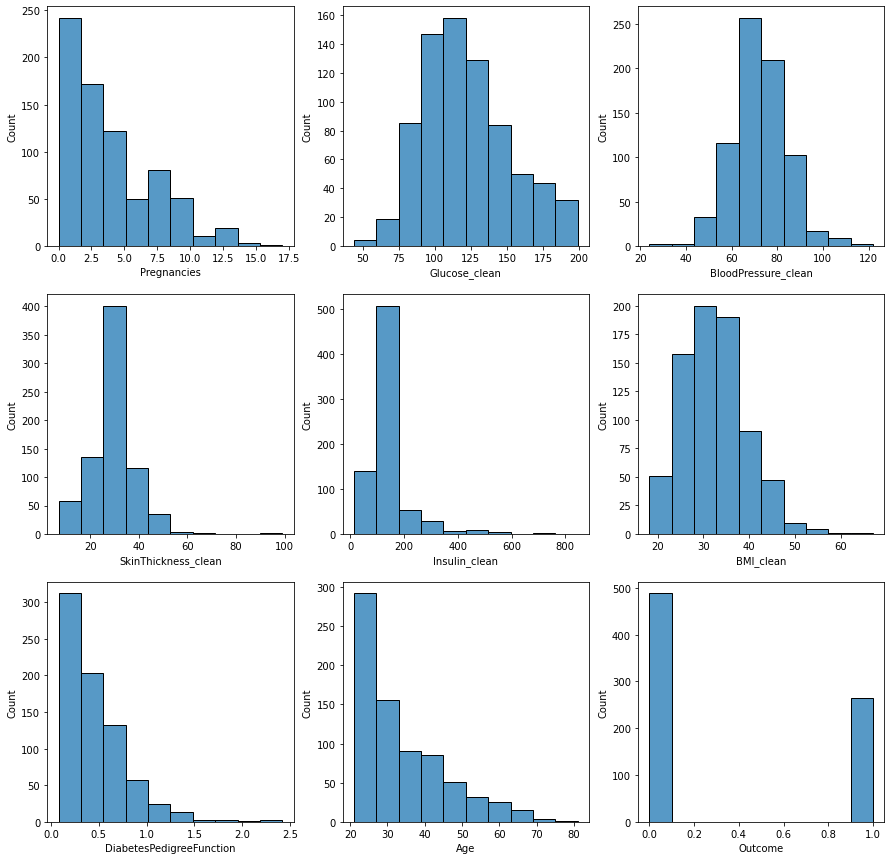

In [18]:
plot_histograms(diabetes_df_clean, ["Pregnancies", "Glucose_clean", "BloodPressure_clean", "SkinThickness_clean", "Insulin_clean", "BMI_clean", "DiabetesPedigreeFunction", "Age", "Outcome"])

#### Section 1.6 Section Summary
We have loaded the data into a dataframe and explored the metadata of the dataframe. We identified problematic data in the form of incorrect data types, missing values (NaN), outliers, as well as erroneous "0" values in columns that should not contain 0 values. 
We have cleaned the data by converting the data types to the correct types, removing rows with missing values, replacing erroneous "0 "values and outliers with the mean of the column. We have also plotted histograms of the data to visualise the distribution of the data.

We can now confidently answer our initial question: "Are there problems in the dataset that should be considered when using this dataset?" with a "No" that allows us to answer our important second question: "Is this dataset suitable for analysis of diabetes in patients?" with a confident "Yes", and with that we continue to section 2 where we will find which features could be useful in predicting diabetes in patients.


### Section 2: Exploratory Data Analysis
Now that we have cleaned our data we can explore if there are correlations in the data that would allow us to predict diabetes. We will do this by creating a correlation matrix and a pairplot.
